### Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df = df.dropna()

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
X = pd.get_dummies(df.drop("species", axis = 1), drop_first=True)
y = df["species"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Random Forest model

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest_10 = RandomForestClassifier(n_estimators = 10, max_features = "sqrt", random_state = 101)

In [14]:
forest_10.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [15]:
predictions = forest_10.predict(X_test)

Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



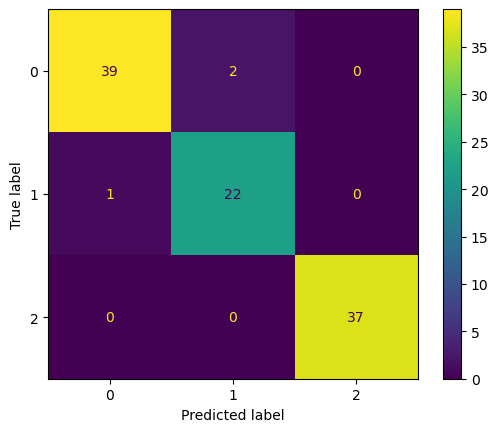

In [19]:
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))
matrix.plot()